# Projeto de Classifica√ß√£o

## O que √© Classifica√ß√£o?

Em problemas de classifica√ß√£o, o objetivo √© categorizar dados em classes distintas. Dado um conjunto de caracter√≠sticas (ou features), o modelo √© treinado para identificar a qual classe uma nova inst√¢ncia de dados pertence. Por exemplo, no contexto de an√°lise de cr√©dito, um modelo de classifica√ß√£o pode prever se um cliente √© um "bom" ou "mau" pagador com base em suas caracter√≠sticas financeiras. Imagina tamb√©m um e-mail que chegou na sua caixa de entrada; poderia ele ser categorizado como Spam ou n√£o? 

# Outline
- [1 - Depend√™ncias](#1)
- [2 - Titanic Dataset](#2)
- [3 - Aquisi√ß√£o e Checagem dos Dados](#3)
- [4 - Prepara√ß√£o dos Dados e Leve An√°lise Explorat√≥ria](#4)
- [5 - Pr√©-Processamento](#5)
- [6 - Treinamento e Avalia√ß√£o](#6)


<a id="1"></a>
## 1 - Depend√™ncias

In [1]:
# geral
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

<a id="2"></a>
## 2 - Titanic Dataset

O Titanic Dataset √© um conjunto de dados amplamente conhecido, utilizado para resolver um problema de **classifica√ß√£o bin√°ria**: prever a sobreviv√™ncia dos passageiros do Titanic com base em diversas caracter√≠sticas pessoais. O objetivo √© treinar um modelo capaz de identificar, dado um novo passageiro, se ele teria ou n√£o sobrevivido ao naufr√°gio do Titanic em 1912. 

Este dataset foi criado a partir do desastre real do RMS Titanic, que afundou em sua viagem inaugural em 15 de abril de 1912, ap√≥s colidir com um iceberg. Dos 2.224 passageiros e tripulantes a bordo, apenas 32% sobreviveram. A falta de botes salva-vidas para todos foi um dos principais motivos para a grande perda de vidas. Embora o fator sorte tenha desempenhado um papel, certos grupos de pessoas tinham mais chances de sobreviver, como mulheres, crian√ßas e membros da classe alta.

### Defini√ß√£o do Problema

Nosso objetivo √© usar o conjunto de dados de treino fornecido para construir um modelo que possa prever a sobreviv√™ncia dos passageiros presentes no conjunto de teste. A vari√°vel-alvo (ou vari√°vel dependente) √© `Survived`, que indica se o passageiro sobreviveu (1) ou n√£o (0). As demais vari√°veis ser√£o tratadas como potenciais preditoras para essa classifica√ß√£o.

### Entendendo as Vari√°veis

Para entender melhor as vari√°veis do Titanic Dataset, vejamos algumas descri√ß√µes detalhadas:

- **Survived**: Esta √© a vari√°vel dependente ou alvo do nosso modelo. Ela indica a sobreviv√™ncia do passageiro, sendo 1 para sobreviventes e 0 para n√£o sobreviventes. Trata-se de uma vari√°vel bin√°ria e nominal.
- **PassengerID** e **Ticket**: S√£o identificadores √∫nicos para cada passageiro, assumidos como aleat√≥rios e sem impacto direto na sobreviv√™ncia.
- **Pclass**: Representa a classe do ticket, que √© um dado ordinal e serve como um proxy para o status socioecon√¥mico do passageiro. A classe 1 representa a classe alta, 2 a classe m√©dia e 3 a classe baixa.
- **Name**: Nome do passageiro, uma vari√°vel nominal. Ela pode ser usada para engenharia de atributos, derivando informa√ß√µes como g√™nero (a partir do t√≠tulo), tamanho da fam√≠lia (a partir do sobrenome), e status socioecon√¥mico (a partir de t√≠tulos como "Dr." ou "Master").
- **Sex** e **Embarked**: Vari√°veis nominais que indicam o sexo do passageiro e o porto de embarque.
- **Age** e **Fare**: Vari√°veis quantitativas cont√≠nuas, representando a idade do passageiro e o pre√ßo do ticket, respectivamente.
- **SibSp** e **Parch**: Representam o n√∫mero de irm√£os/c√¥njuges e pais/filhos a bordo, respectivamente.
- **Cabin**: Indica a cabine do passageiro, uma vari√°vel nominal que pode ser usada para inferir a posi√ß√£o aproximada no navio e at√© mesmo o status socioecon√¥mico, com base no n√≠vel do deck.

### An√°lise Inicial do Problema

O conjunto de dados de treino permite observar quais caracter√≠sticas (features) dos passageiros est√£o mais correlacionadas com a sobreviv√™ncia. O objetivo final √© construir um modelo que consiga identificar corretamente as chances de sobreviv√™ncia com base nas caracter√≠sticas fornecidas para cada passageiro no conjunto de teste.

<a id="3"></a>
## 3 - Aquisi√ß√£o e Checagem dos Dados

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
labels = pd.read_csv("./data/gender_submission.csv")

test_df = test_df.join(labels.set_index('PassengerId'), on='PassengerId', rsuffix='_label')
combine = [train_df, test_df]

In [3]:
def visualize_info_data(combine):
    for data in combine:
        data.info()
        print("-"*30)

In [4]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
visualize_info_data(combine)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

**Quais features s√£o categ√≥ricas?**

Esses valores classificam as amostras em conjuntos de amostras semelhantes. Dentro das features categ√≥ricas, os valores s√£o nominais, ordinais, proporcionais (ratio) ou intervalares? Entre outras coisas, isso nos ajuda a selecionar os gr√°ficos apropriados para visualiza√ß√£o.

**Categ√≥ricas:** Survived, Sex e Embarked. **Ordinal:** Pclass.

**Quais features s√£o num√©ricas?**

Esses valores mudam de amostra para amostra. Dentro das features num√©ricas, os valores s√£o discretos, cont√≠nuos ou baseados em s√©ries temporais? Entre outras coisas, isso nos ajuda a selecionar os gr√°ficos apropriados para visualiza√ß√£o.

**Cont√≠nuas:** Age, Fare. **Discretas:** SibSp, Parch.

<a id="4"></a>
## 4 - Prepara√ß√£o dos Dados e Leve An√°lise Explorat√≥ria

Das informa√ß√µes dos Dataframes, n√≥s conseguimos ver que h√° algumas colunas com valores **nulos**, seja no de treino, seja no de teste. Assim, vamos dar uma olhada nessas colunas.

In [6]:
print('Colunas de Treinamento com valores nulos:\n', train_df.isnull().sum())
print("-"*30)

print('Colunas de Teste com valores nulos:\n', test_df.isnull().sum())
print("-"*30)

Colunas de Treinamento com valores nulos:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Colunas de Teste com valores nulos:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64
------------------------------


#### Tratando valores nulos

Primeiramente, d√™ uma olhada na vari√°vel `Cabin`. Vamos dar uma olhada na porcentagem da quantidade de dados nulos em rela√ß√£o ao total.

In [7]:
print(f"Esta √© a porcentagem de valores nulos na coluna 'Cabin' no conjunto de treino: {int(train_df.isnull().sum()['Cabin'])/len(train_df)*100:.2f}%")
print(f"Esta √© a porcentagem de valores nulos na coluna 'Cabin' no conjunto de teste: {int(test_df.isnull().sum()['Cabin'])/len(test_df)*100:.2f}%")

Esta √© a porcentagem de valores nulos na coluna 'Cabin' no conjunto de treino: 77.10%
Esta √© a porcentagem de valores nulos na coluna 'Cabin' no conjunto de teste: 78.23%


√â uma porcentagem realmente alta. Nesse sentido, os dados pertencentes a essa feature n√£o agregar√£o valor. Com isso, vamos dropar dos datasets.

In [8]:
train_df.drop(['Cabin'], axis=1, inplace = True)
test_df.drop(['Cabin'], axis=1, inplace = True)
combine = [train_df, test_df]

In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [11]:
print('Colunas de Treinamento com valores nulos:\n', train_df.isnull().sum())
print("-"*30)

print('Colunas de Teste com valores nulos:\n', test_df.isnull().sum())
print("-"*30)

Colunas de Treinamento com valores nulos:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
------------------------------
Colunas de Teste com valores nulos:
 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64
------------------------------


Agora, primeiramente no conjunto de treino, n√≥s podemos observar que as colunas `Age` e `Embarked` possuem valores nulos, mas como a porcentagem em rela√ß√£o ao total √© desprez√≠vel (praticamente) entendemos que elas podem, de fato, agregar valor para a predi√ß√£o.

Dado as caracter√≠sticas das features, faria sentido tomarmos a **m√©dia** para completarmos a coluna `Age` e utilizar a **moda** para completarmos a coluna `Embarked`.

In [12]:
# completando valores nulos de Age com m√©dia
train_df.fillna({'Age': train_df['Age'].median()}, inplace = True)

# completando valores nulos de Embarked com moda
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace = True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


No que tange ao conjunto de teste, n√≥s podemos observar que as colunas `Age` e `Fare` possuem valores nulos, mas como a porcentagem em rela√ß√£o ao total tamb√©m √© desprez√≠vel (praticamente), entendemos que elas podem, de fato, agregar valor para a predi√ß√£o.

Dado as caracter√≠sticas das features, faria sentido tomarmos a **m√©dia** para completarmos ambas as colunas.

In [14]:
# completando valores nulos de Age com m√©dia
test_df.fillna({'Age': test_df['Age'].median()}, inplace = True)

# completando valores nulos de Fare com m√©dia
test_df.fillna({'Fare': test_df['Fare'].median()}, inplace = True)

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


#### Sele√ß√£o de features

Nesse caso, estarei selecionando features que agregam valor √† predi√ß√£o justamente excluindo algumas que temos certeza que n√£o impactar√£o este resultado final e outras para simplifica√ß√£o do modelo. Neste sentido, pensando em:

- **PassengerID** e **Ticket**: como j√° citados acima, s√£o praticamente identificadores √∫nicos, mas de certa forma aleat√≥rios. Estes recursos, assim, s√£o independentes do evento de sobreviv√™ncia.
- **Name**: pode ser usado para engenharia de features, mas vamos tratar a priori que tamb√©m s√£o independentes e √∫nicos para cada indiv√≠duo (para fins de simplifica√ß√£o).

Com isso, eu consigo agora exclu√≠-los e ficar com as features restantes.

In [16]:
train_df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace = True)
test_df.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace = True)

In [17]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

#### Algumas an√°lises

Abaixo, voc√™ pode observar que h√° uma relevante correla√ß√£o (> 0.5) para quando os passageiros eram da classe 1 (Pclass = 1) e Survived. Isso pode indicar que passageiros de `alta classe` possuiam mais chances de sobreviver.

In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Tamb√©m podemos perceber que grande parte dos passageiros que sobreviveram eram do sexo `feminino`.

In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

Quanto √† idade dos passageiros, note uma coisa:

- Beb√™s (Idade <= 4) tiveram alta taxa de sobreviv√™ncia.
- Os passageiros mais velhos (Idade = 80) sobreviveram.
- Um grande n√∫mero de jovens/adultos de 15 a 25 anos n√£o sobreviveu.
- A maioria dos passageiros est√° na faixa et√°ria de 15 a 35 anos.

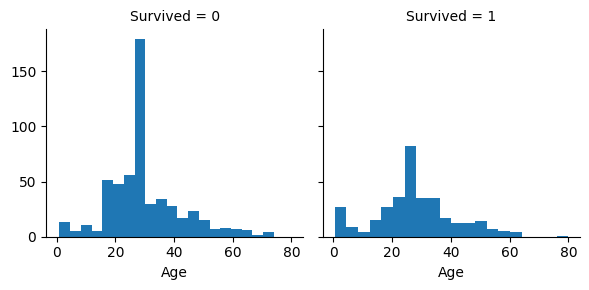

In [21]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Al√©m disso, vamos dar uma olhada nas distribui√ß√µes das vari√°veis num√©ricas que temos:

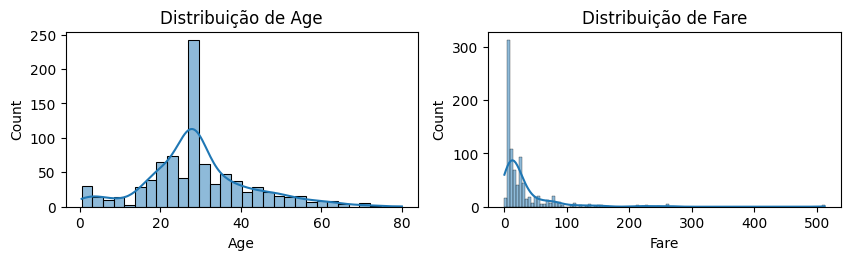

In [22]:
# Exemplo para duas vari√°veis
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribui√ß√£o de Age')

plt.subplot(2, 2, 2)
sns.histplot(train_df['Fare'], kde=True)
plt.title('Distribui√ß√£o de Fare')

plt.show()


√â poss√≠vel notar uma assimetria a direita para a coluna `Fare`. H√° bons ind√≠cios de que teremos outliers, conforme abaixo, e isso poder√° impactar na forma como passamos ao modelo. Apesar de ser bom remover outliers, n√£o s√£o quantidades significativas e os dados dispon√≠veis para treinamento j√° n√£o s√£o muitos; podemos realizar uma tratagem no pr√© processamento, normalizando-os. No entanto, ao olhar para `Age`, a coluna est√° bem distribu√≠da e assumimos que n√£o vai demonstrar grandes varia√ß√µes de valores que afetem o treinamento do modelo.

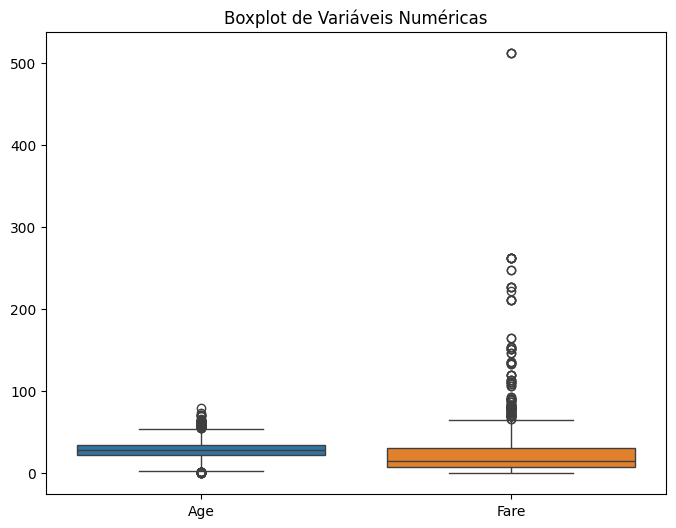

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df[['Age', 'Fare']])
plt.title('Boxplot de Vari√°veis Num√©ricas')
plt.show()


<a id="5"></a>
## 5 - Pr√©-Processamento

#### Tomando os dummies para as vari√°veis categ√≥ricas



### Entendendo as Vari√°veis

Para entender melhor as vari√°veis do Titanic Dataset, vejamos algumas descri√ß√µes detalhadas:

- **Survived**: Esta √© a vari√°vel dependente ou alvo do nosso modelo. Ela indica a sobreviv√™ncia do passageiro, sendo 1 para sobreviventes e 0 para n√£o sobreviventes. Trata-se de uma vari√°vel bin√°ria e nominal.
- **PassengerID** e **Ticket**: S√£o identificadores √∫nicos para cada passageiro, assumidos como aleat√≥rios e sem impacto direto na sobreviv√™ncia.
- **Pclass**: Representa a classe do ticket, que √© um dado ordinal e serve como um proxy para o status socioecon√¥mico do passageiro. A classe 1 representa a classe alta, 2 a classe m√©dia e 3 a classe baixa.
- **Name**: Nome do passageiro, uma vari√°vel nominal. Ela pode ser usada para engenharia de atributos, derivando informa√ß√µes como g√™nero (a partir do t√≠tulo), tamanho da fam√≠lia (a partir do sobrenome), e status socioecon√¥mico (a partir de t√≠tulos como "Dr." ou "Master").
- **Sex** e **Embarked**: Vari√°veis nominais que indicam o sexo do passageiro e o porto de embarque.
- **Age** e **Fare**: Vari√°veis quantitativas cont√≠nuas, representando a idade do passageiro e o pre√ßo do ticket, respectivamente.
- **SibSp** e **Parch**: Representam o n√∫mero de irm√£os/c√¥njuges e pais/filhos a bordo, respectivamente.
- **Cabin**: Indica a cabine do passageiro, uma vari√°vel nominal que pode ser usada para inferir a posi√ß√£o aproximada no navio e at√© mesmo o status socioecon√¥mico, com base no n√≠vel do deck.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

# Defini√ß√µes das colunas
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']
discrete_features = ['SibSp', 'Parch']

# Transforma√ß√µes
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

discrete_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    # Pode escalar tamb√©m se quiser:
    ('scaler', StandardScaler())
])

# Pipeline combinada
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('disc', discrete_transformer, discrete_features)
    ]
)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("Survived", axis=1)
Y_test  = test_df["Survived"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 7), (891,), (418, 7), (418,))

<a id="6"></a>
## 6 - Treinamento e Avalia√ß√£o

### O que √© uma Regress√£o Log√≠stica?

A regress√£o log√≠stica √© um modelo estat√≠stico amplamente utilizado para resolver problemas de **classifica√ß√£o bin√°ria**. Diferentemente da **regress√£o linear**, cujo objetivo √© prever um valor cont√≠nuo, a regress√£o log√≠stica busca prever a probabilidade de uma inst√¢ncia pertencer a uma determinada classe (por exemplo, 0 ou 1, sobreviv√™ncia ou n√£o sobreviv√™ncia). 

Para isso, a regress√£o log√≠stica utiliza uma fun√ß√£o n√£o-linear chamada **sigmoide**, que mapeia valores reais para um intervalo entre 0 e 1, tornando-a ideal para problemas de classifica√ß√£o.

#### A Fun√ß√£o Sigmoide

A fun√ß√£o sigmoide √© definida como:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

onde $z$ √© o valor linear da combina√ß√£o dos atributos e dos pesos, dado por:

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \vec{X} \cdot \vec{\theta}
$$

A fun√ß√£o sigmoide transforma o valor linear $z$ em uma probabilidade, $g(z)$, que varia entre 0 e 1. Podemos interpretar essa probabilidade como a chance da inst√¢ncia pertencer √† classe 1.

Ao treinar um modelo de regress√£o log√≠stica, precisamos de uma m√©trica que indique o qu√£o bem o modelo se ajusta aos dados. Para isso, utilizamos a **fun√ß√£o de perda** (loss function) para medir o erro de uma √∫nica amostra, e a **fun√ß√£o de custo** (cost function) para calcular o erro m√©dio de todo o conjunto de dados.

### Fun√ß√£o de Perda (Loss Function)

A fun√ß√£o de perda mede o erro de predi√ß√£o para uma √∫nica inst√¢ncia. No caso da regress√£o log√≠stica, a perda $ L(\theta; x^{(i)}, y^{(i)}) $ √© dada pela **Binary Cross-Entropy** para cada exemplo $ i $:

$$
L(\theta; x^{(i)}, y^{(i)}) = - \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

onde:
- $ h_\theta(x^{(i)}) $ √© a previs√£o do modelo para a amostra $ i $, dada pela fun√ß√£o sigmoide $ g(z) $,
- $ y^{(i)} $ √© o valor verdadeiro da amostra $ i $ (0 ou 1).

Essa fun√ß√£o de perda √© configurada para penalizar previs√µes incorretas de maneira assim√©trica, de forma que a perda √© maior quando a predi√ß√£o est√° mais distante do valor verdadeiro.

### Fun√ß√£o de Custo (Cost Function)

A fun√ß√£o de custo para a regress√£o log√≠stica, denotada por $ J(\theta) $, √© a m√©dia das perdas para todas as amostras no conjunto de dados. Isso nos d√° uma medida geral do desempenho do modelo em rela√ß√£o a todo o conjunto de treino. Ela √© definida como:

$$
J(\vec{\theta}) = \frac{1}{m} \sum_{i=1}^{m} L(\theta; x^{(i)}, y^{(i)}) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

onde:
- $ m $ √© o n√∫mero total de amostras no conjunto de treino.

A fun√ß√£o de custo $ J(\theta) $ representa o erro m√©dio do modelo. Durante o treinamento, queremos encontrar os valores dos par√¢metros $ \theta $ que minimizam essa fun√ß√£o de custo, ou seja, que resultam no menor erro m√©dio de previs√£o.

### Intui√ß√£o sobre a Fun√ß√£o de Perda e a Fun√ß√£o de Custo

- **Fun√ß√£o de Perda**: Calcula o erro para uma √∫nica amostra. Quanto maior o erro, maior ser√° a perda associada a essa amostra.
- **Fun√ß√£o de Custo**: Calcula o erro m√©dio para todas as amostras no conjunto de treino. Minimizar essa fun√ß√£o implica ajustar os par√¢metros $ \theta $ para que o modelo produza previs√µes mais precisas para o conjunto de dados como um todo.

Assim, o objetivo do treinamento √© **minimizar a fun√ß√£o de custo** $ J(\theta) $ para encontrar os par√¢metros √≥timos que reduzem a perda m√©dia. Isso √© feito com algoritmos de otimiza√ß√£o, como o **Gradiente Descendente**.

#### Gradiente e Otimiza√ß√£o

Para encontrar os par√¢metros $ \vec{\theta} $ que minimizam a fun√ß√£o de custo $ J(\vec{\theta}) $, usamos o **Gradiente Descendente**. O gradiente da fun√ß√£o de custo em rela√ß√£o a cada par√¢metro $ \theta_j $ √© dado por:

$$
\frac{\partial J(\vec{\theta})}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

Com o gradiente, atualizamos os par√¢metros $ \vec{\theta} $ de acordo com a seguinte regra:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\vec{\theta})}{\partial \theta_j}
$$

onde $ \alpha $ √© a **taxa de aprendizado** (learning rate) que controla o tamanho do passo em cada itera√ß√£o.

#### Limite de Decis√£o (Decision Boundary)

Ap√≥s o treinamento, o modelo calcula uma probabilidade para cada inst√¢ncia. Para tomar decis√µes de classifica√ß√£o, utilizamos um **limite de decis√£o**. No caso bin√°rio, se a probabilidade prevista $ h_\theta(x) $ for maior ou igual a 0.5, classificamos a inst√¢ncia como classe 1. Caso contr√°rio, classificamos como classe 0. Assim:

$$
\hat{y} = 
\begin{cases} 
1 & \text{se } h_\theta(x) \geq 0.5 \\
0 & \text{se } h_\theta(x) < 0.5 
\end{cases}
$$




In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Monta pipeline completa com modelo
model = make_pipeline(preprocessor, LogisticRegression(solver='liblinear')) #RandomForestClassifier(n_estimators=100, random_state=42))

# Treina
model.fit(X_train, Y_train)

# Prediz
Y_pred = model.predict(X_test)

              Not Survived  Survived
Not Survived           254        12
Survived                10       142
------------------------------


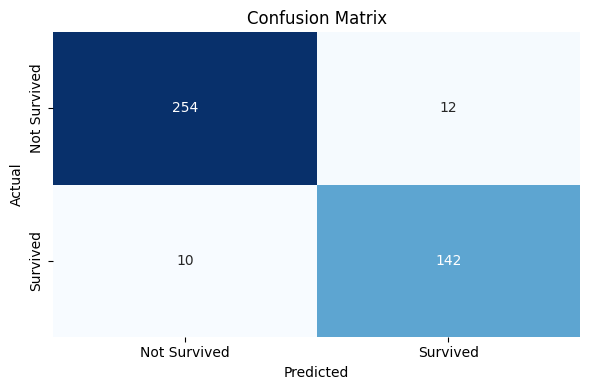

In [26]:
# Confunsion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Criando a matriz de confus√£o
cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm, index=['Not Survived', 'Survived'], columns=['Not Survived', 'Survived'])

# Exibindo a matriz no terminal
print(cm_df)
print("-"*30)

# Visualizando com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## M√©tricas 

### üéØ Avalia√ß√£o de Modelos de Classifica√ß√£o Bin√°ria

Ao treinar um modelo de classifica√ß√£o bin√°ria, √© essencial avaliar sua performance de maneira completa. Para isso, utilizamos m√©tricas baseadas na **matriz de confus√£o**, que nos permite entender como o modelo est√° classificando exemplos positivos e negativos.

### üìå Matriz de Confus√£o

A matriz de confus√£o √© uma tabela que resume as predi√ß√µes feitas por um modelo de classifica√ß√£o:

|                   | Previsto Positivo | Previsto Negativo |
|-------------------|-------------------|-------------------|
| **Real Positivo** | Verdadeiro Positivo (TP) | Falso Negativo (FN) |
| **Real Negativo** | Falso Positivo (FP) | Verdadeiro Negativo (TN) |

Esses quatro valores s√£o a base para as principais m√©tricas:

### üìê M√©tricas Derivadas da Matriz de Confus√£o

- **Acur√°cia (Accuracy)**: Propor√ß√£o de previs√µes corretas.
  $$
  \text{Acur√°cia} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precis√£o (Precision)**: Entre as predi√ß√µes positivas, quantas realmente s√£o positivas?
  $$
  \text{Precis√£o} = \frac{TP}{TP + FP}
  $$

- **Revoca√ß√£o / Sensibilidade (Recall / Sensitivity)**: Entre os exemplos positivos reais, quantos foram corretamente classificados?
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score**: M√©dia harm√¥nica entre precis√£o e recall.
  $$
  F1 = 2 \cdot \frac{\text{Precis√£o} \cdot \text{Recall}}{\text{Precis√£o} + \text{Recall}}
  $$


Estas m√©tricas devem ser analisadas em conjunto para entender o desempenho real do modelo, especialmente em datasets desbalanceados.


In [27]:
report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not Survived       0.96      0.95      0.96       266
    Survived       0.92      0.93      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418



In [28]:
report = classification_report(Y_train, model.predict(X_train), target_names=['Not Survived', 'Survived'])
print(report)

              precision    recall  f1-score   support

Not Survived       0.82      0.87      0.85       549
    Survived       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891

